In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [56]:
train_data_dir="cifar-10-img/train"
test_data_dir="cifar-10-img/test"

In [57]:
train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [58]:
train_batch_size=10000
train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32,32),
    batch_size=train_batch_size,
    class_mode='sparse',
    shuffle=True
)
test_batch_size=1000
test_generator=test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32,32),
    batch_size=test_batch_size,
    class_mode='sparse',
    shuffle=True
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [45]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [80]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten to 1D
x_test_flat = x_test.reshape(x_test.shape[0], -1)     # Flatten to 1D
x_train_flat.shape

(10000, 3072)

In [46]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [76]:
model = keras.Sequential([
    # Input layer - flattened image (32*32*3 = 3072 pixels)
    keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
    keras.layers.Dropout(0.3),
    
    # Hidden layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    
    # Output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(x_train_flat,y_train,epochs=100,batch_size=128,validation_data=(x_test_flat,y_test))

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4351 - loss: 1.5806 - val_accuracy: 0.4150 - val_loss: 1.7265
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4348 - loss: 1.5793 - val_accuracy: 0.4480 - val_loss: 1.6554
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4407 - loss: 1.5659 - val_accuracy: 0.4100 - val_loss: 1.6949
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4431 - loss: 1.5637 - val_accuracy: 0.4250 - val_loss: 1.6697
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4396 - loss: 1.5692 - val_accuracy: 0.4420 - val_loss: 1.6607
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4498 - loss: 1.5503 - val_accuracy: 0.4210 - val_loss: 1.6628
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4433 - loss: 1.5482 - val_accuracy: 0.4190 - val_loss: 1.7368
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4486 - loss: 1.5389 - val_accuracy: 0.

In [66]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print(f"\nTest Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4060 - loss: 1.7072

Test Accuracy: 0.4059999883174896
Test Loss: 1.707222819328308


In [67]:
labels = list(test_generator.class_indices.keys())

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
actual:  airplane
predicted:  deer


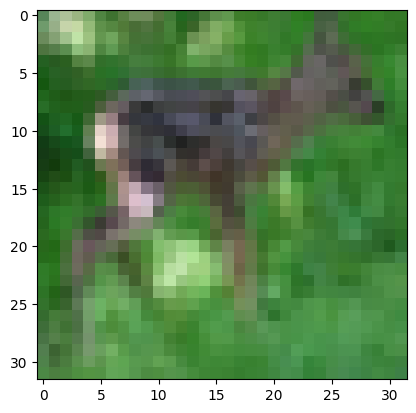

In [70]:
n=11
plt.imshow(x_test[n])
prediction=model.predict(x_test_flat)
print("actual: ",labels[np.argmax(y_test[n])])
print("predicted: ",labels[np.argmax(prediction[n])])

In [71]:
history=history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

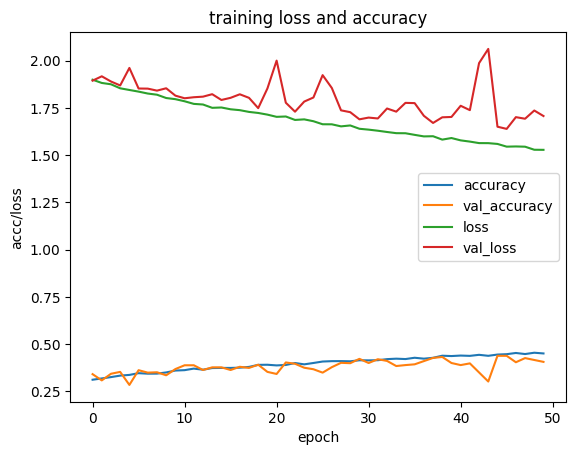

In [72]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('training loss and accuracy')
plt.xlabel('epoch')
plt.ylabel('accc/loss')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])